In [ ]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
import datetime as dt
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.patheffects as pe
import calendar
import cartopy.feature as cfeature
import geopandas
from cartopy.io import img_tiles
import cartopy.crs as ccrs
from math import floor
import matplotlib.ticker as mticker 
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, natural_earth
from shapely.geometry import box
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import h5py
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import warnings



In [ ]:
# Load in the creepmeter dataframe
creepmeters = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv')
creepmeters.drop_duplicates('Creepmeter_abbrv',inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='XMBC'].index,inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='TABC'].index,inplace=True)
creepmeters.reset_index(inplace=True,drop=True)


    Unnamed: 0 Network Creepmeter_abbrv File_code  \
0            0     EAF             BAL1   BAL1_1T   
1            1    PARK             C461  C461_10T   
2            2    PARK             C462   C462_1T   
3            3     UTA             CAN1  CAN1_30T   
4            4     NAF             CER1  CER1_30S   
..         ...     ...              ...       ...   
73         128     EAF             YZW1   YZW1_1T   
74         129   SOCAL             COML  COML_30T   
75         130   SOCAL             COLE  COLE_30T   
76         131   SOCAL             COLW   COLW_5T   
77         133   SOCAL             EASH   EASH_5T   

                     Start Time                     End Time  \
0   2023-03-12T10:47:55.000000Z  2023-09-05T13:14:55.000000Z   
1   2004-09-29T02:20:00.000000Z  2022-06-20T12:40:00.000000Z   
2   2021-08-19T19:10:11.000000Z  2024-03-22T01:05:11.000000Z   
3   2012-06-12T15:33:00.000000Z  2017-06-15T08:33:00.000000Z   
4   2019-10-09T06:46:00.000000Z  2024-05-23

In [ ]:
#sort into regions

########## East Anatolia ############
EAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="EAF"].index)
EAF.reset_index(inplace=True,drop=True)
EAF.sort_values(by='Latitude',inplace=True,ascending=False)
EAF.reset_index(inplace=True,drop=True)

########## North Anatolia ############
NAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="NAF"].index)
NAF.sort_values(by='Longitude',inplace=True,ascending=True)
NAF.reset_index(inplace=True,drop=True)


########## Parkfield ############
PARK = creepmeters.drop(creepmeters[creepmeters["Network"]!="PARK"].index)
PARK.reset_index(inplace=True,drop=True)
PARK.sort_values(by='Latitude',inplace=True,ascending=False)
PARK.reset_index(inplace=True,drop=True)
PARK

########## Hayward ############
HAY = creepmeters.drop(creepmeters[creepmeters["Network"]!="HAY"].index)
HAY.sort_values(by='Latitude',inplace=True,ascending=False)
HAY.reset_index(inplace=True,drop=True)
HAY

########## Hollister ############
HOL = creepmeters.drop(creepmeters[creepmeters["Network"]!="HOL"].index)
HOL.reset_index(inplace=True,drop=True)
CAL = creepmeters.drop(creepmeters[creepmeters["Network"]!="CAL"].index)
CAL.reset_index(inplace=True,drop=True)
HOL = pd.concat([HOL,CAL],ignore_index=True)
HOL.sort_values(by='Latitude',inplace=True,ascending=False)
HOL.reset_index(inplace=True,drop=True)

########## Chaman ############
CHAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="CHAF"].index)
CHAF.reset_index(inplace=True,drop=True)

########## Dead Sea ############
DSF = creepmeters.drop(creepmeters[creepmeters["Network"]!="DSF"].index)
DSF.reset_index(inplace=True,drop=True)

########## Utah ############
UTA = creepmeters.drop(creepmeters[creepmeters["Network"]!="UTA"].index)
UTA.reset_index(inplace=True,drop=True)

########## SoCal ############
SOCAL= creepmeters.drop(creepmeters[creepmeters["Network"]!="SOCAL"].index)
SOCAL.sort_values(by='Latitude',inplace=True,ascending=False)
SOCAL.reset_index(inplace=True,drop=True)

########## Ridgecrest ############
RID = creepmeters.drop(creepmeters[creepmeters["Network"]!="RID"].index)
RID.sort_values(by='Latitude',inplace=True,ascending=False)
RID.reset_index(inplace=True,drop=True)

   Unnamed: 0 Network Creepmeter_abbrv File_code                   Start Time  \
0         122     CAL             XSH1   XSH1_1T  2020-10-15T17:01:59.000000Z   

                      End Time  Sampling rate, Hz Sampling rate, mins  \
0  2024-10-09T18:37:59.000000Z           0.016667                  1T   

   Latitude  Longitude Length Depth  Obliquity Creepmeter_full_name  \
0    36.943   -121.445   14 m   NaN       41.5          Shore Rd #1   

             Fault  
0  Calaveras Fault  


In [ ]:
# Print number of instruments in each region
print('EAF:',len(EAF))
print('NAF:',len(NAF))
print('PARK:',len(PARK))
print('HAY:',len(HAY))
print('HOL:',len(HOL))
print('CHAF:',len(CHAF))
print('UTA:',len(UTA))
print('SOCAL:',len(SOCAL))
print('RID:',len(RID))
print('DSF:',len(DSF))


EAF: 14
NAF: 10
PARK: 15
HAY: 5
HOL: 11
CHAF: 1
UTA: 1
SOCAL: 14
RID: 6
DSF: 1


In [ ]:
# print total number of instruments in regions of interest
print(' number of instruments total',len(PARK) + len(HAY) + len(HOL) + len(SOCAL)+ len(RID) + len(UTA) + len(EAF) + len(NAF) + len(CHAF) + len(DSF))
print(' number of instruments California',len(PARK) + len(HAY) + len(HOL) + len(SOCAL)+ len(RID))
print(' number of instruments Turkiye',len(EAF) + len(NAF))

 number of instruments total 78
 number of instruments California 51
 number of instruments Turkiye 24


In [ ]:
cmap=cmc.managua

In [ ]:
# Load in GIS files
gdf_Asia = geopandas.read_file("../../Data/GIS_Files/AFEAD_v2022/AFEAD_v2022.shp")
gdf_USA = geopandas.read_file("../../Data/GIS_Files/Shapefile/QFaults.shp")
gdf_Cali = gdf_USA.drop(gdf_USA[gdf_USA.Location!='California'].index)
gdf_Utah = gdf_USA.drop(gdf_USA[gdf_USA.Location!='Utah'].index)

In [ ]:
# Load in the picks dataframe
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_12_JUN_2025.csv",index_col=0)
# split into creep events, creeplets and surges
df_all['Start Time'] = pd.to_datetime(df_all['Start Time'])
df_all.drop(df_all[df_all['Start Time']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.02].index,inplace=True)
df_ce = df_all.copy(deep=True)
print(len(df_ce))
df_creeplet = df_ce.drop(df_ce[abs(df_ce['Displacement, mm'])>0.1].index)
df_surge = df_ce.drop(df_ce[df_ce['Duration, hrs']<720].index)
df_creeplet.drop(df_creeplet[df_creeplet['Duration, hrs']>720].index,inplace=True)
df_creeplet.drop(df_creeplet[df_creeplet['Displacement, mm']<0.02].index,inplace=True)
print('creeplet no',len(df_creeplet),'med dur',np.median(df_creeplet['Duration, hrs']),'dis',np.median(df_creeplet['Displacement, mm']))
print('surge no',len(df_surge),'med dur', np.median(df_surge['Duration, hrs']),'dis',np.median(df_surge['Displacement, mm']))
df_ce.drop(df_ce[df_ce['Duration, hrs']>720].index,inplace=True)
df_ce.drop(df_ce[df_ce['Displacement, mm']<0.1].index,inplace=True)
print('creep events', len(df_ce),'med dur', np.median(df_ce['Duration, hrs']),'dis',np.median(df_ce['Displacement, mm']))
colours  = cmap(np.linspace(0, 1, 10))

5695
30253.33361111111
26.82999000000001
creeplet no 1063 med dur 9.68361111111111 dis 0.0561442784262133
surge no 207 med dur 1322.1663888888888 dis 1.6400000000000006
creep events 4428 med dur 29.95847222222222 dis 0.4600000000000008


In [ ]:
# Save the dataframes
df_creeplet.to_csv('../../Data/DATA_tidied/creeplets.csv')
df_surge.to_csv('../../Data/DATA_tidied/surge.csv')

In [ ]:
# Function to make scatter plot with error bars and inset bar chart
def scatter_points_bars(instrument_dataframe, event_dataframe, axis, cmap,
                        xticks=True, yticks=True,
                        df_ce=None, df_surge=None, df_creeplet=None):

    
    axis.set_xscale('log')
    axis.set_yscale('log')
    axis.set_xlim([1/60,10000])
    axis.set_ylim([0,20])
    x = []
    y= []
    total_events = 0
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    network = instrument_dataframe['Network'].iloc[0]

    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter abbreviation'] == abbrv]
            total_events += len(instrument_df)
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)
            if abbrv not in ['SU30']:
                y.append(dur_med)
                x.append(disp_med)

            yerr = [[dur_med-dur15], [dur85-dur_med]]
            xerr = [[disp_med-disp15], [disp85-disp_med]]
            '''axis.errorbar(disp_med,dur_med, xerr=xerr, yerr=yerr,
                          fmt='none', ecolor='k', alpha=0.5, capsize=3)'''
            #axis.scatter(displacement,duration,s=50,c=rgb2hex(colours[i]),alpha=0.5,edgecolors='k',label=abbrv)
            

            if abbrv in ['SU30','XHSW','XRSW','XSH1','DS30']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='s')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
            elif abbrv in ['RR45','CHA1']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='^')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='^')
            elif abbrv in ['SH30','CAN1']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='D')
            elif abbrv in ['COLW']:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none',marker='D')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='X')
            else:
                axis.scatter(displacement,duration,s=20,
                             c=rgb2hex(colours[i]),alpha=0.5,edgecolors='none')
                axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)

        except IndexError:
            print('no events')

    # Legends
    if network == 'PARK':
        legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,ncols=3,fontsize=9)
    else:
        legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True,fontsize=9,ncols=2)
    legend1.get_title().set_fontsize(11)
    

    plt.gca().add_artist(legend1)
    

    # Custom ticks
    if yticks:
        axis.set_yticks([1/60,1, 24, 168,720,8760,2*8760,3*8760])
        axis.set_yticklabels(['1 minute','1 hour', '1 day', '1 week','1 month','1 year','2 years','3 years'],fontsize=11)
        axis.set_ylabel('Duration',fontsize=11)
    else:
        axis.set_yticks([1/60,1, 24, 168,720,8760,2*8760])
        axis.set_yticklabels(['', '', '','',''])
        
    if xticks:
        axis.set_xticks([0.01,0.1,1,10,25])
        axis.set_xticklabels([ r'10$\mu m$', r'100$\mu m$',r'1$mm$',r'10$mm$',r'25$mm$'],fontsize=11)
        axis.set_xlabel('Displacement',fontsize=11)
    else:
        axis.set_xticks([0.01,0.1,1,10,25])
        axis.set_xticklabels([ '', '','','',''],fontsize=11)

    plt.xlim([0,30])
    plt.ylim([1/61,32000])

    axis.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # === Inset: stacked bar chart of events by type ===
    cmap = cmc.managua
    colors_bar = cmap(np.linspace(0, 1, 3))
    if df_ce is not None and df_surge is not None and df_creeplet is not None:
        ax_inset = inset_axes(axis, width="25%", height="25%", loc='lower right',
                      bbox_to_anchor=(-0.01, 0.07, 1, 1),
                      bbox_transform=axis.transAxes, borderpad=0)

        meters = instrument_dataframe['Creepmeter_abbrv'].tolist()
        ce_counts = [len(df_ce[df_ce['Creepmeter abbreviation'] == m]) for m in meters]
        surge_counts = [len(df_surge[df_surge['Creepmeter abbreviation'] == m]) for m in meters]
        creeplet_counts = [len(df_creeplet[df_creeplet['Creepmeter abbreviation'] == m]) for m in meters]

        ax_inset.bar(meters, ce_counts, label='ECE', color=colors_bar[0], edgecolor='none',alpha=0.6)
        ax_inset.bar(meters, surge_counts, bottom=ce_counts, label='MLCS', color=colors_bar[1], edgecolor='none',alpha=0.6)
        ax_inset.bar(meters, creeplet_counts,
                     bottom=np.array(ce_counts) + np.array(surge_counts),
                     label='CLTS', color=colors_bar[2], edgecolor='none',alpha=0.6)

        ax_inset.tick_params(axis='x', rotation=90, labelsize=8)
        ax_inset.tick_params(axis='y', labelsize=8)
        ax_inset.set_ylabel('Count', fontsize=8)
        ax_inset.legend(fontsize=8, frameon=True)

    return


number of events in California: 4919


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value

no events


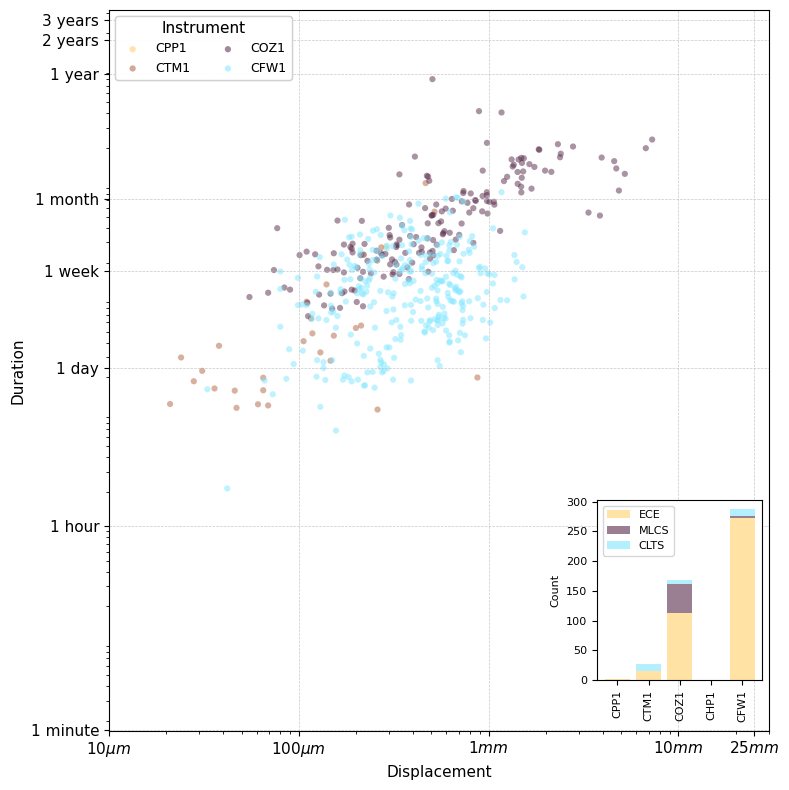

In [ ]:
# Plot Hayward duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(HAY,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hayward_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or pro

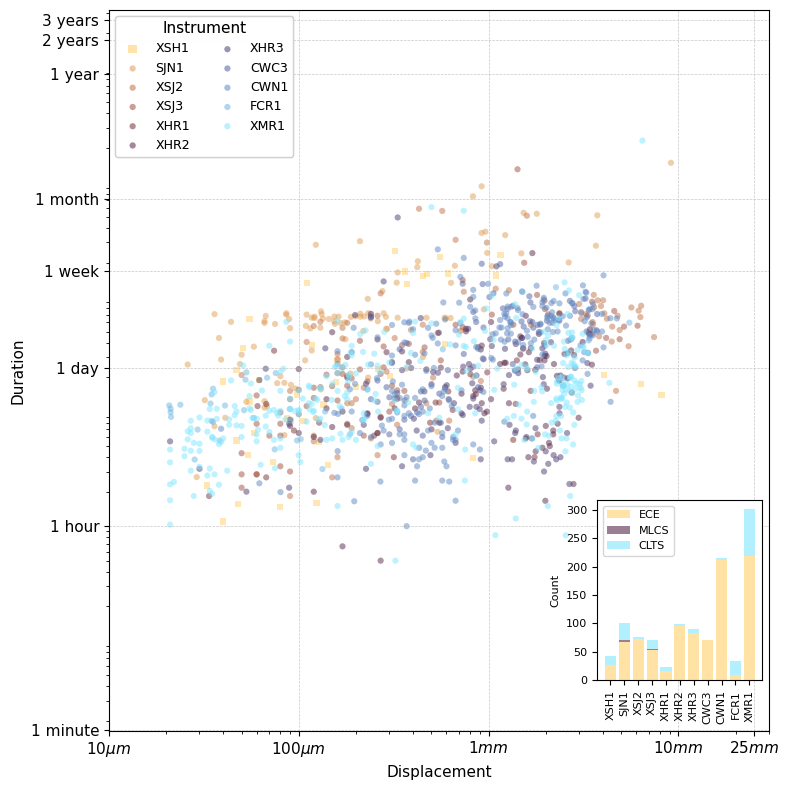

In [ ]:
# Plot Hollister duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(HOL,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hollister_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a

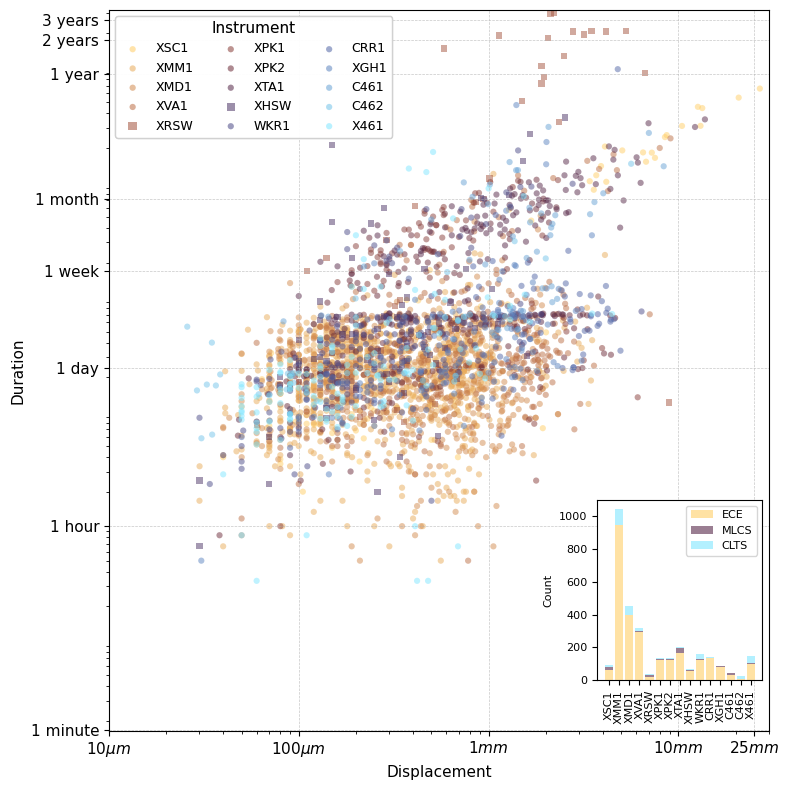

In [ ]:
# Plot Parkfield duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(PARK,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatte

no events
no events
no events


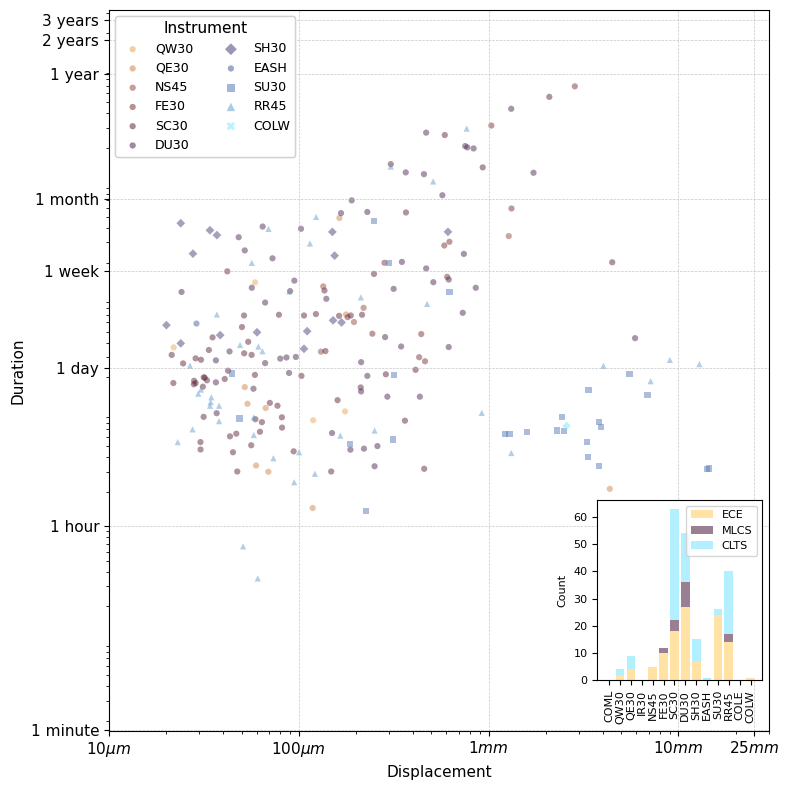

In [ ]:
# Plot SoCal duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(SOCAL,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/SoCal_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:101: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,30])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/2087516961.py:5: UserWarning: This figure includes Axes that are 

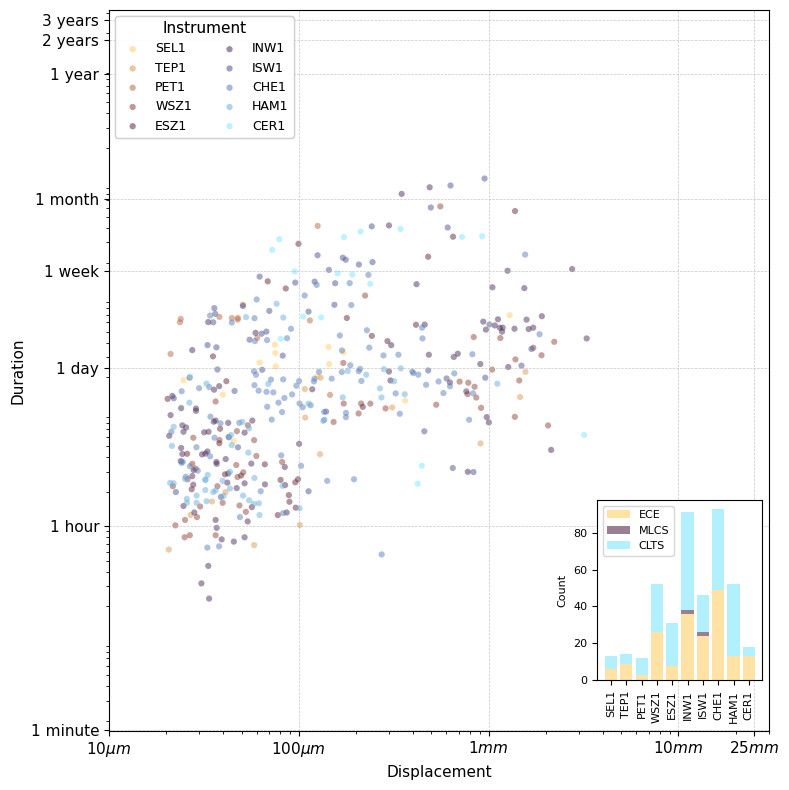

In [ ]:
# Plot North Anatolia duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(NAF,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_duration_vs_displacement_bars.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',s=20)
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value

no events


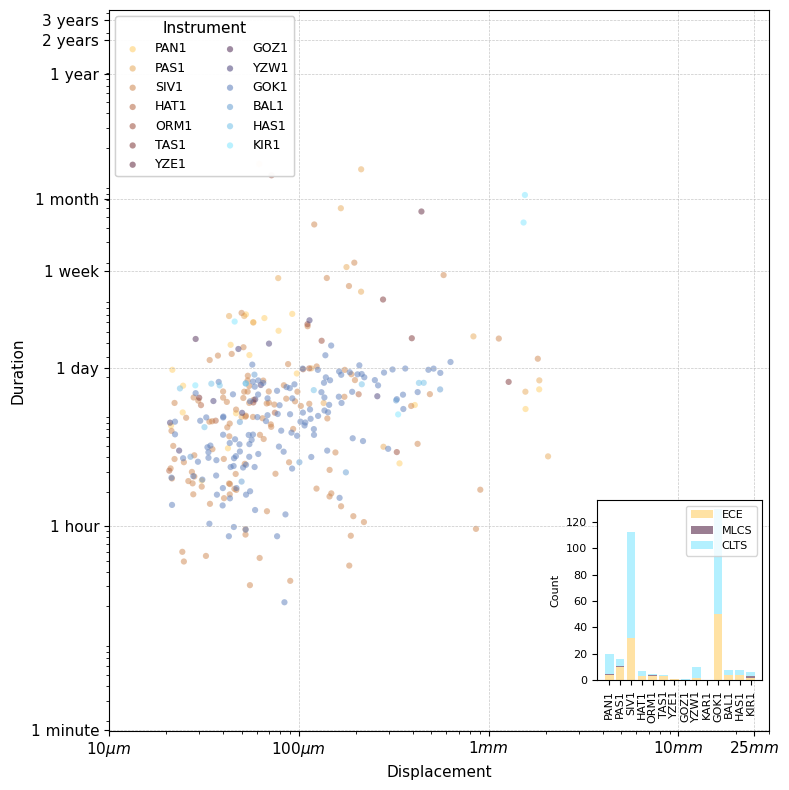

In [ ]:
# Plot East Anatolia duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(EAF,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/EAF_duration_vs_displacement_bars.pdf')
plt.show()

In [28]:
others = pd.concat([DSF,CHAF,UTA])

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim([0,20])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv,edgecolors='none',marker='s')
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/4151040903.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or pro

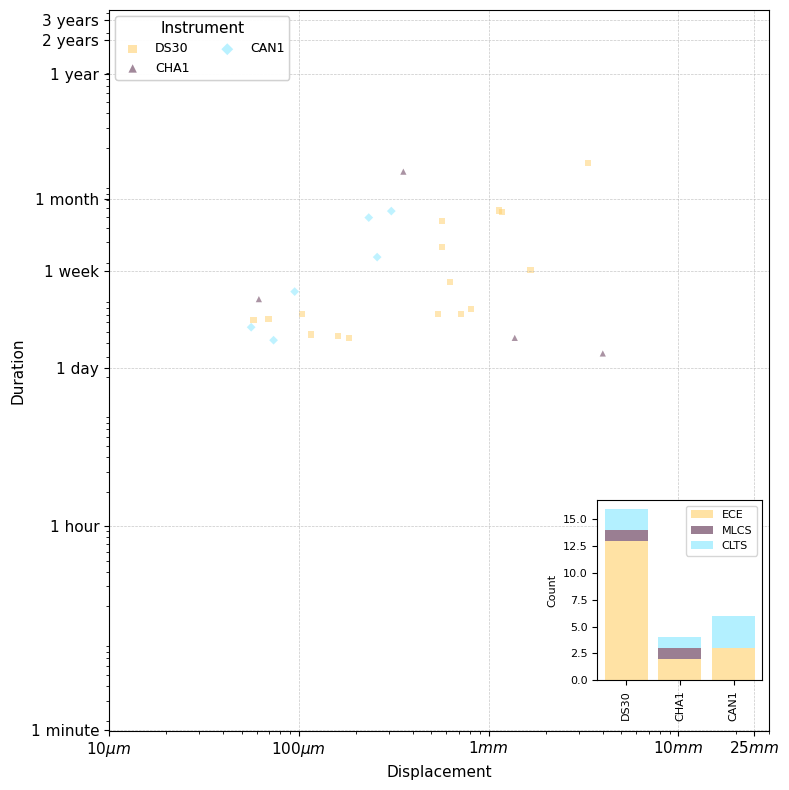

In [ ]:
# Plot Israel, Pakistan and Utah duration vs displacement with error bars and inset bar chart
fig = plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1)
#axa.set_title("Hayward")
scatter_points_bars(others,df_all,axa,cmap,xticks=True,yticks=True,df_ce=df_ce, df_surge=df_surge, df_creeplet=df_creeplet)
plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Utah_Pakistan_Israel_duration_vs_displacement_bars.pdf')
plt.show()

Maps

In [32]:
def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1

def scale_bar(ax, proj, length, location=(0.2, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """

    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [pe.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [pe.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


def cm_plotter(ax,creepmeters_list,gdf,extent,color,shift,scale,show_labels=True):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Add Fault geometries
    ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    # Add gridlines with specific label font sizes
    gl = ax.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')



        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(extent[0], 1), np.round(extent[1], 1)
        lat_min, lat_max = np.round(extent[2], 1), np.round(extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range < 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range < 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    # Add annotation with an arrow and transform
    for i in range(len(creepmeters_list)):
        abbrv = creepmeters_list['Creepmeter_abbrv'].iloc[i]
        lat = creepmeters_list['Latitude'].iloc[i]
        long = creepmeters_list['Longitude'].iloc[i]
        face_color = rgb2hex(color[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if abbrv in ['XRSW', 'XTA1','XHSW', 'C461','CWN1','CRR1','XMM1','XSJ3','XHR2','QE30','NS45','DU30','RA','GS','XMR1','CFW1']:
                xytext_lon = long - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = long + 0.1
            if abbrv in ['CPP1','CWC3','CWN1','XSJ2']:
                xytext_lat = lat-0.01
            elif abbrv in ['X461','XPK2']:
                xytext_lat = lat-0.02
            elif abbrv in ['XRSW']:
                xytext_lat = lat+0.01
            elif abbrv in ['XHR1']:
                xytext_lat = lat+0.03
                xytext_lon = long - 0.1

            else:
                xytext_lat = lat
        if shift == 'vertical':
            if abbrv in ['NS45','COLW']:
                xytext_lon = long 
                xytext_lat = lat + 0.2
            elif abbrv in ['SH30']:
                xytext_lon = long + 0.2
                xytext_lat = lat
            elif abbrv in ['EASH']:
                xytext_lon = long + 0.3
                xytext_lat = lat - 0.2
            elif abbrv in ['DU30']:
                xytext_lon = long + 0.3
                xytext_lat = lat + 0.2
            elif abbrv in ['QW30']:
                xytext_lon = long - 0.1
                xytext_lat = lat + 0.2
            elif abbrv in ['QE30']:
                xytext_lon = long - 0.1
                xytext_lat = lat - 0.2
            elif abbrv in ['SC30']:
                xytext_lon = long + 0.1
                xytext_lat = lat + 0.2
            else:
                xytext_lon = long 
                xytext_lat = lat - 0.2
        
        
        
        ax.annotate(
            creepmeters_list['Creepmeter_abbrv'].iloc[i], 
            xy=(creepmeters_list['Longitude'].iloc[i], creepmeters_list['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        ax.scatter(
            creepmeters_list['Longitude'].iloc[i], 
            creepmeters_list['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
        scale_bar(ax, ccrs.PlateCarree(), scale)
    return





def ymd_to_ydec(ST):
    y = int(ST.strftime("%Y"))
    dt_starter = dt.datetime(y,1,1,0,0,0)
    diff = (ST.replace(tzinfo=None)-dt_starter)/dt.timedelta(days=1)
    isleapyear = calendar.isleap(y)
    if isleapyear == True:
        diff_dec = diff/366
    else:
        diff_dec = diff/365
    date_dec = y+diff_dec
    return date_dec


    

In [ ]:
# Create a map subplot with OpenStreetMap tiles and custom features
def mapsubplot(axis,extent,cmap,instrument_dataframe,faults,scale,shift):
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()
    # Add OpenStreetMap tiles to the plot
    axis.add_image(osm, 10)  # Zoom level of 8  
    # Add natural earth features for oceans and lakes
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axis.add_feature(ocean, zorder=0)  # Add oceans first
    axis.add_feature(lakes, zorder=1)  # Add lakes
    axis.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axis.coastlines(resolution='50m')
    cm_plotter(axis,instrument_dataframe,faults,extent,colours,shift,scale)
    return

In [ ]:

# Suppress specific warning
warnings.filterwarnings("ignore", message="Approximating coordinate system")

hollister_extent = [-121.65,-121.15,36.5,37.0]
hayward_extent = [-122.42,-121.92,37.5,38]
parkfield_extent = [-120.65,-120.1,35.55,36.1]
salton_sea_extent = [-117.25,-115.25,32.2,34.2]
RID_extent = [-117.8,-117.2, 35.2,35.8]




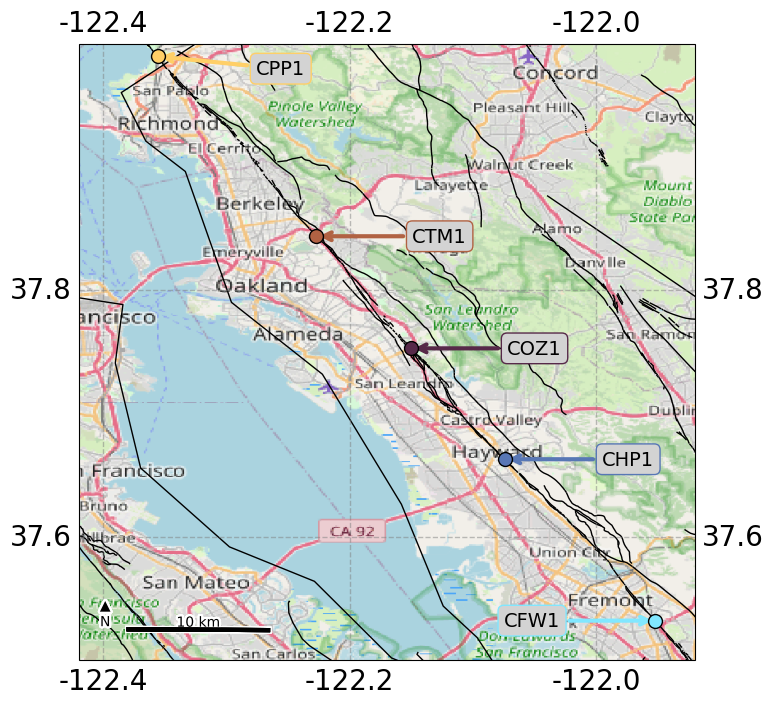

In [ ]:
# Plot Hayward map
fig = plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axa,hayward_extent,cmap,HAY,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hayward_map.pdf')
plt.show()

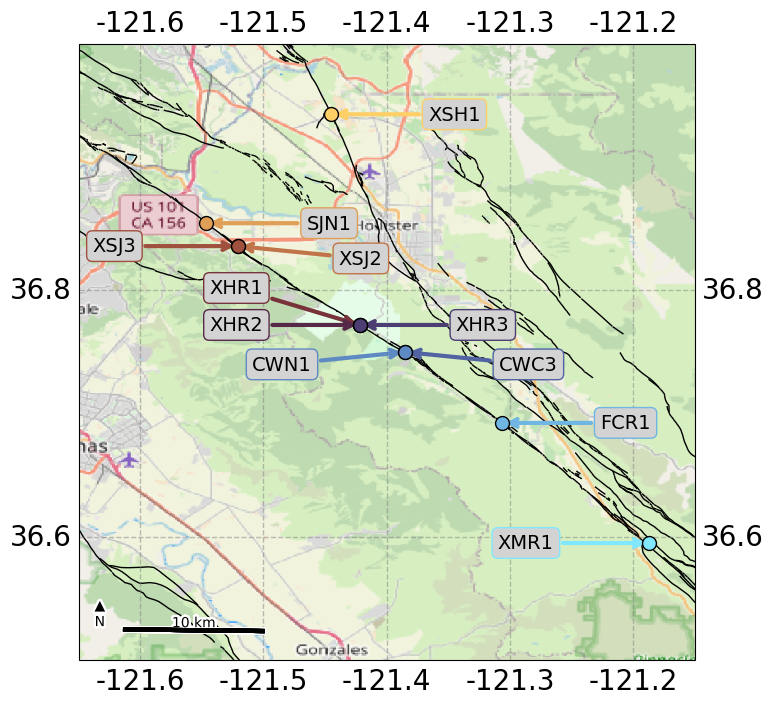

In [ ]:
# Plot Hollister map
fig = plt.figure(figsize=(20,8))
axb = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axb,hollister_extent,cmap,HOL,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Hollister_map.pdf')
plt.show()



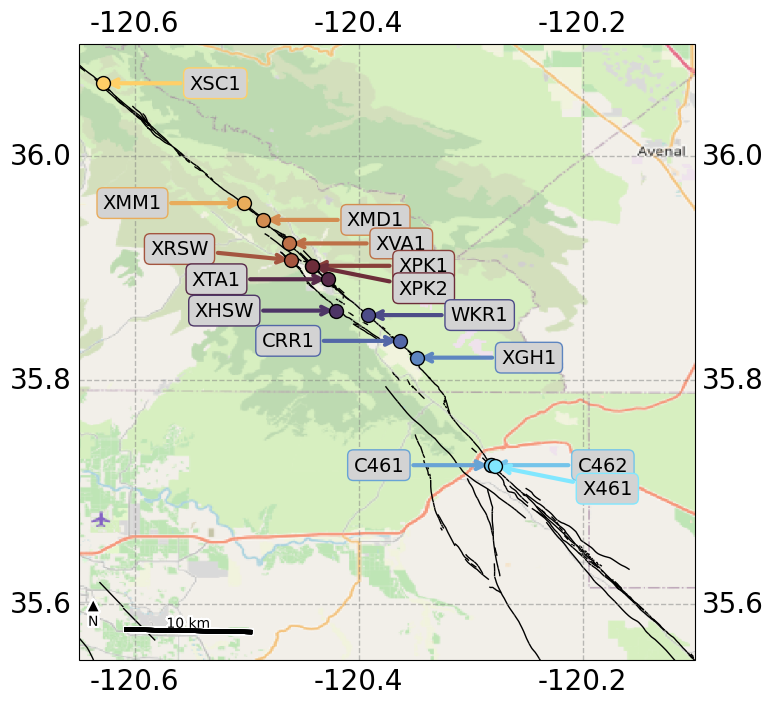

In [ ]:
# Plot Parkfield map
fig = plt.figure(figsize=(20,8))
axc = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axc,parkfield_extent,cmap,PARK,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_map.pdf')
plt.show()


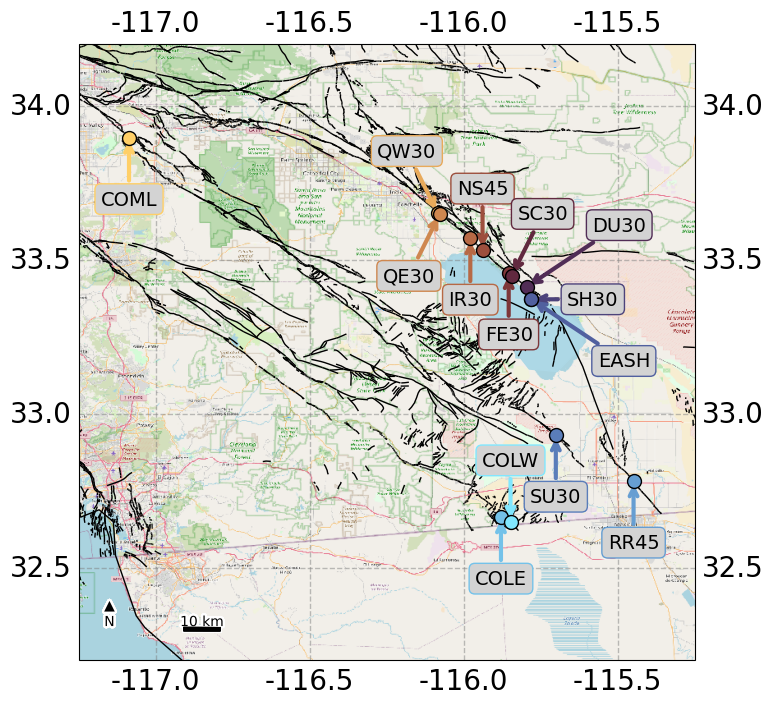

In [ ]:
# Plot SoCal map
fig = plt.figure(figsize=(20,8))
axd = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axd,salton_sea_extent,cmap,SOCAL,gdf_Cali,10,'vertical')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/SOCAL_map.pdf')
plt.show()

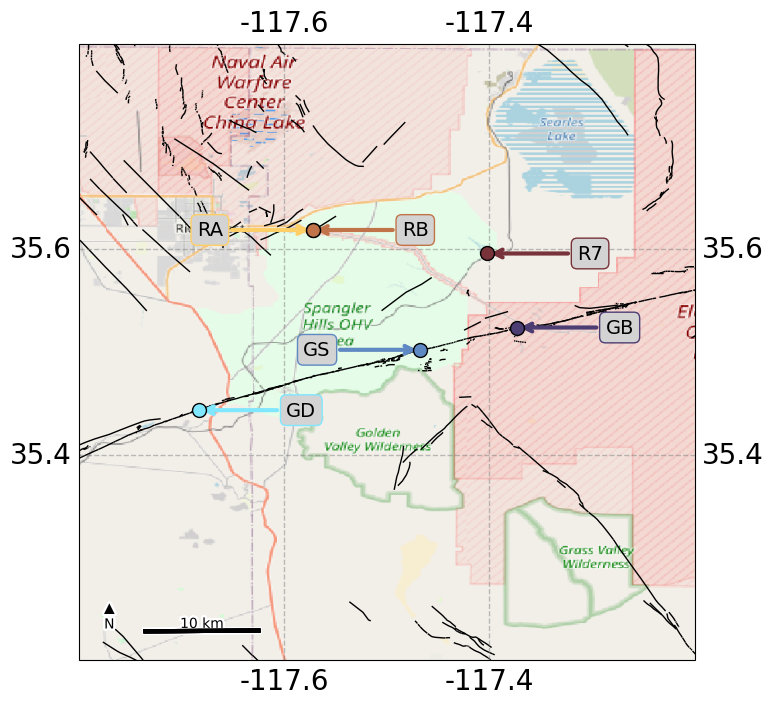

In [ ]:
# Plot Ridgecrest map
fig = plt.figure(figsize=(20,8))
axe = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axe,RID_extent,cmap,RID,gdf_Cali,10,'horizontal')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Ridgecrest_map.pdf')
plt.show()

In [ ]:
# Plot NAF map function
def NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 100)
    return

In [ ]:
# Plot EAF map function
def EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap,show_labels=True):
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()

    # Add OpenStreetMap tiles to the plot
    axa.add_image(osm, 10)  # Zoom level of 8 

    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')

    axa.set_extent(EAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
        lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False


    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(EAF)))


    for i in range(len(EAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if EAF['Creepmeter_abbrv'].iloc[i] in ['XRSW', 'XTA1','XHSW', 'C461','CWN1/CWC3','CRR1','XMM1','QW30','SC30/72/TE']:
                xytext_lon = EAF['Longitude'].iloc[i] - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = EAF['Longitude'].iloc[i] + 0.1
            xytext_lat = EAF['Latitude'].iloc[i]
        if shift == 'vertical':
            xytext_lon = EAF['Longitude'].iloc[i] 
            xytext_lat = EAF['Latitude'].iloc[i] + 0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['TAS1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.3
                xytext_lat = EAF['Latitude'].iloc[i]
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZW1','BAL1']:
                xytext_lon = EAF['Longitude'].iloc[i]
                xytext_lat = EAF['Latitude'].iloc[i]-0.3
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZE1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.2
                xytext_lat = EAF['Latitude'].iloc[i]-0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['PAS1']:
                xytext_lon = EAF['Longitude'].iloc[i] 
                xytext_lat = EAF['Latitude'].iloc[i] - 0.2
        
        
        axa.annotate(
            EAF['Creepmeter_abbrv'].iloc[i], 
            xy=(EAF['Longitude'].iloc[i], EAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            EAF['Longitude'].iloc[i], 
            EAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 100)
    return

In [ ]:
# Plot NAF map function with zoom
def NAF_map_Zoom(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        gl.xformatter = mticker.FormatStrFormatter('%.1f')
        gl.yformatter = mticker.FormatStrFormatter('%.1f')

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)+2))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i+2])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [ ]:
# Define extents for different regions
pakistan_extent = [61, 78, 23, 38]
EAF_extent = [36.0, 40.25, 36.0, 39]
NAF_extent = [29.5,33.1,40.4,41.1]
UTA_extent = [-114.2,-108.5, 36.8,42.2]
turkey_extent = [26.0, 45.0, 36.0, 42.0]
NAF_zoom_extent = [31.9,33.1,40.5,41.1]
Israel_extent = [34.2, 35.9, 29.4, 33.3]

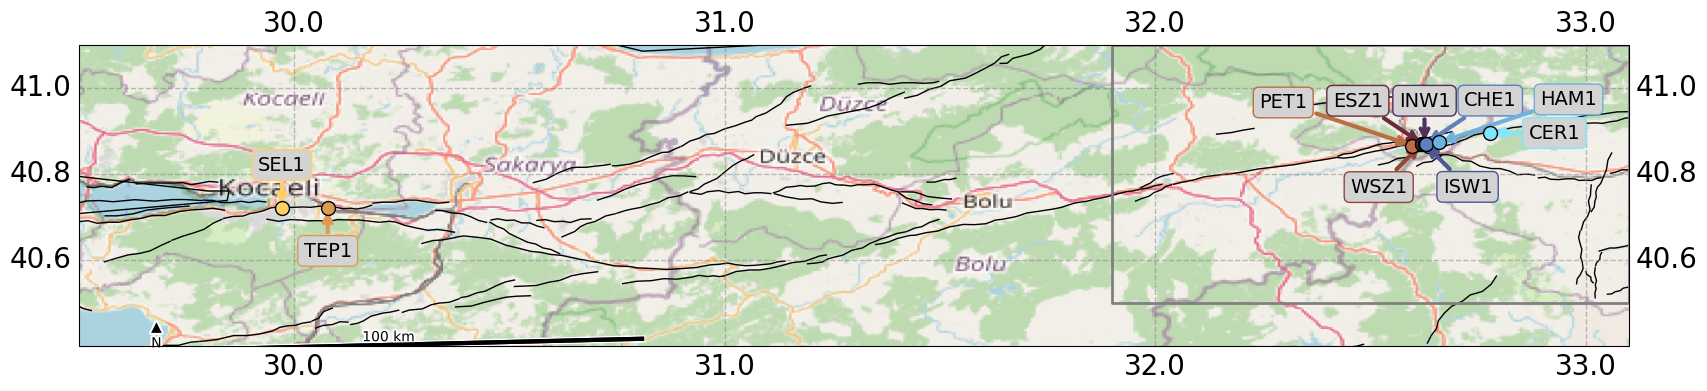

In [ ]:
# Plot NAF map
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap)
bbox = box(NAF_zoom_extent[0], NAF_zoom_extent[2], NAF_zoom_extent[1], NAF_zoom_extent[3])
axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor='grey', facecolor='none', linestyle='-', linewidth=2)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_map.pdf')
plt.show()

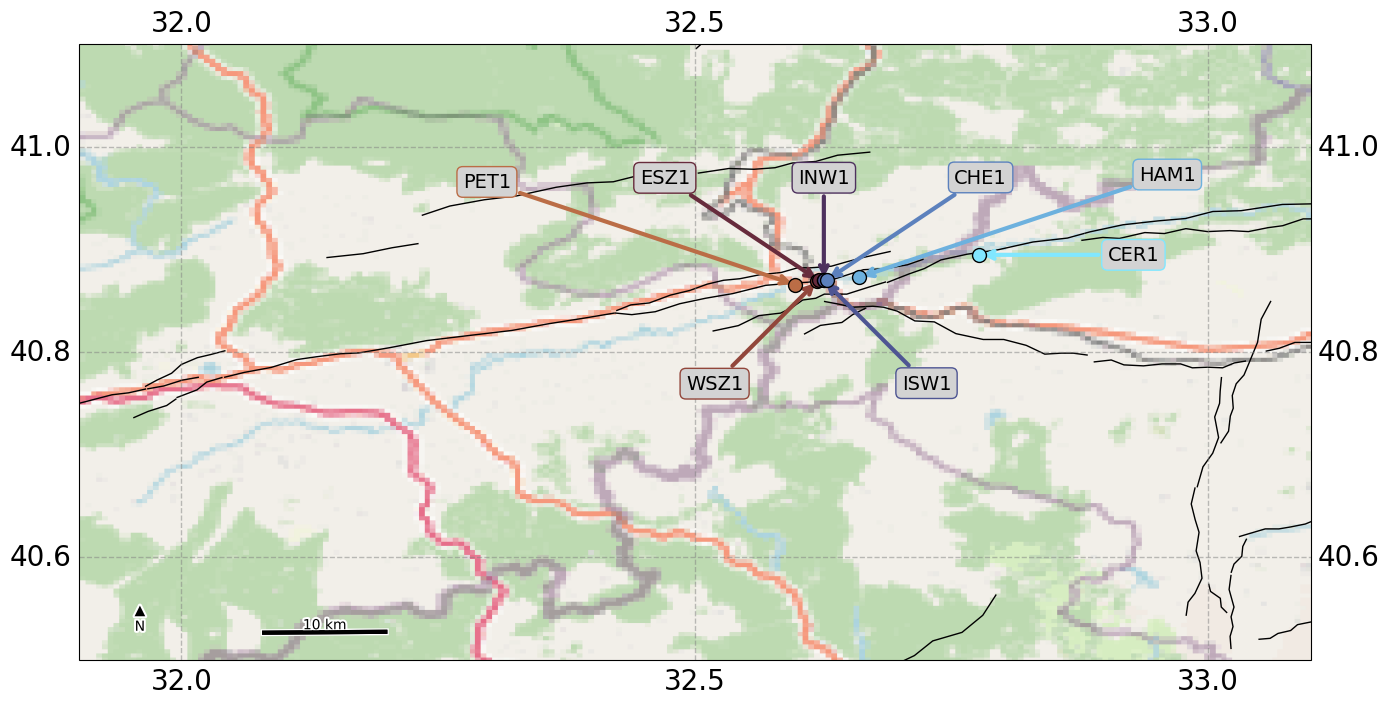

In [ ]:
# Plot NAF zoom map
NAF_ZOOM = NAF.copy(deep=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='SEL1'].index,inplace=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='TEP1'].index,inplace=True)
NAF_ZOOM.reset_index(inplace=True,drop=True)
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map_Zoom(axa,NAF_zoom_extent,gdf_Asia,NAF_ZOOM,cmap)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/NAF_zoom_map.pdf')
plt.show()

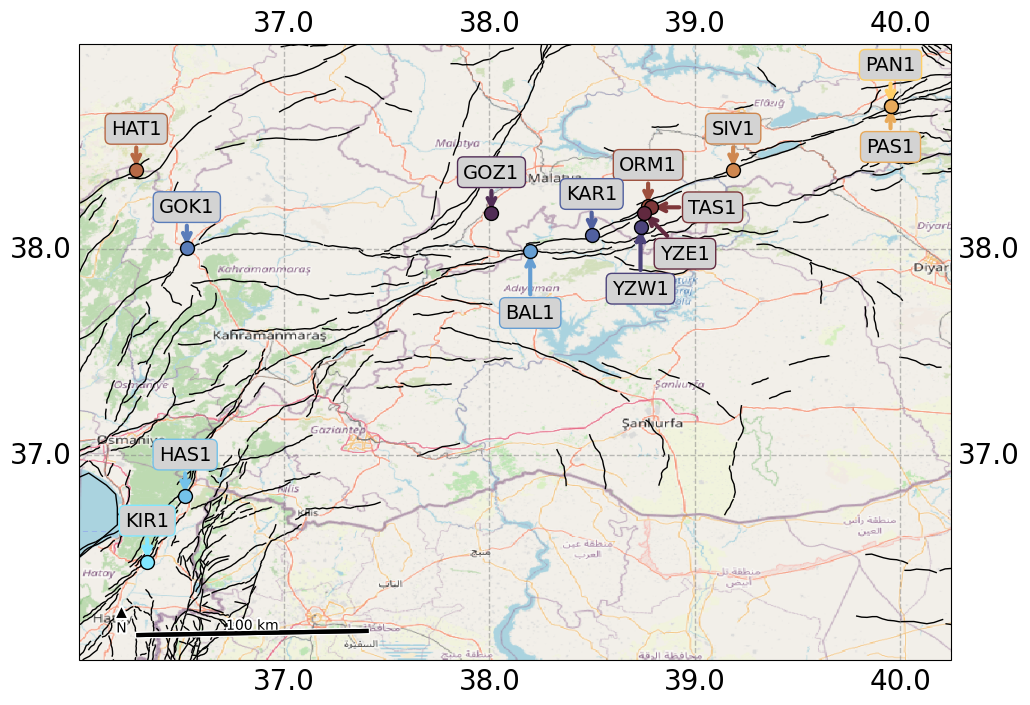

In [ ]:
# Plot EAF map
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/EAF_map.pdf')
plt.show()




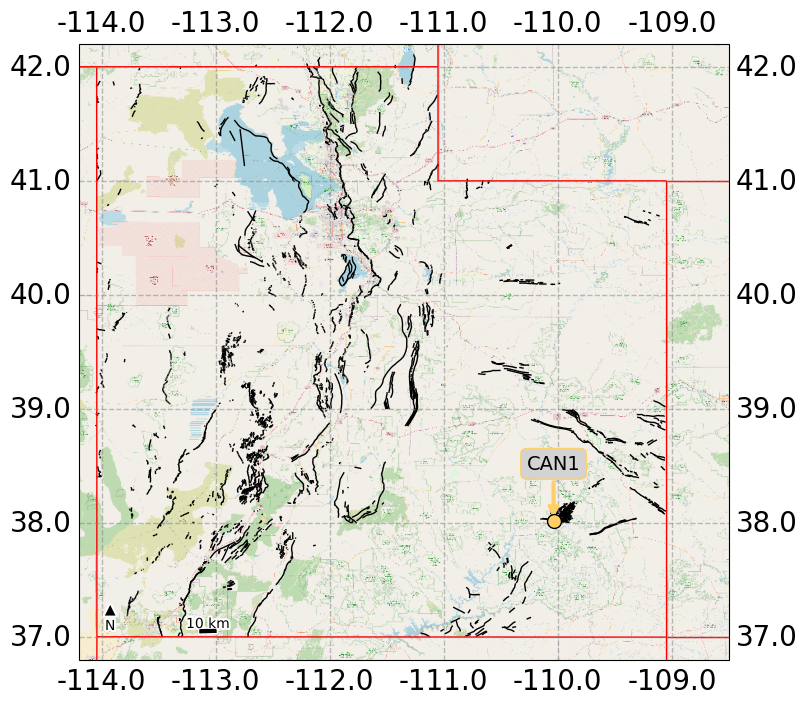

In [ ]:
# Plot Utah map
fig = plt.figure(figsize=(20, 8))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(UTA_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Utah.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

# Add state boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

axa.add_feature(states_provinces, edgecolor='red',linewidth=1)
colours  = cmap(np.linspace(0, 1, 3))
for i in range(len(UTA)):
    
    face_color = rgb2hex(colours[0])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = UTA['Longitude'].iloc[i] + 0.2
        xytext_lat = UTA['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = UTA['Longitude'].iloc[i] 
        xytext_lat = UTA['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = UTA['Longitude'].iloc[i]
            xytext_lat = UTA['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        UTA['Creepmeter_abbrv'].iloc[i], 
        xy=(UTA['Longitude'].iloc[i], UTA['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        UTA['Longitude'].iloc[i], 
        UTA['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 100)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Utah_map.pdf')
plt.show()

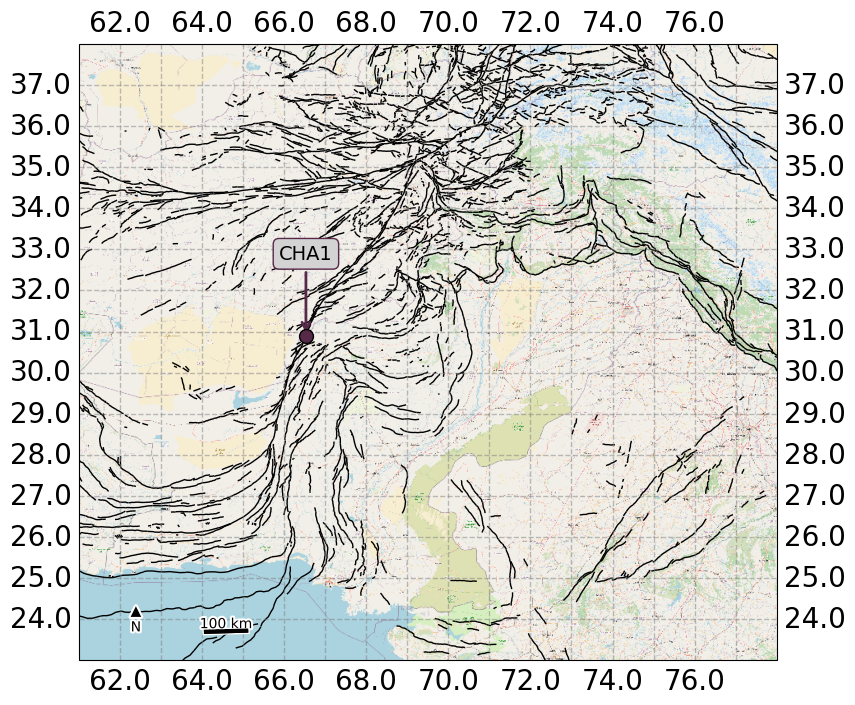

In [ ]:
# Plot Pakistan map
fig = plt.figure(figsize=(20, 8))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 8)  # Zoom level of 8 
axa.set_extent(pakistan_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")


show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(CHAF)):
    face_color = rgb2hex(colours[1])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = CHAF['Longitude'].iloc[i] + 0.5
        xytext_lat = CHAF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = CHAF['Longitude'].iloc[i] 
        xytext_lat = CHAF['Latitude'].iloc[i]+2
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = CHAF['Longitude'].iloc[i]
            xytext_lat = CHAF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        CHAF['Creepmeter_abbrv'].iloc[i], 
        xy=(CHAF['Longitude'].iloc[i], CHAF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        CHAF['Longitude'].iloc[i], 
        CHAF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 100)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Pakistan_map.pdf')
plt.show()

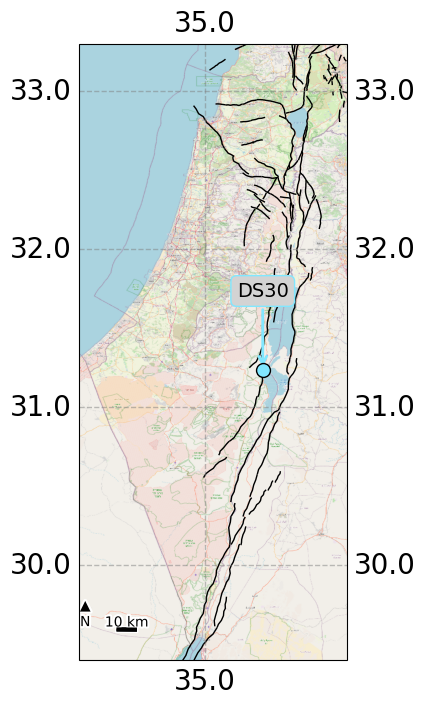

In [ ]:
# Plot Israel map
fig = plt.figure(figsize=(20, 8))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(Israel_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
'''for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Israel':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)'''



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    
    gl.xformatter = mticker.FormatStrFormatter('%.1f')
    gl.yformatter = mticker.FormatStrFormatter('%.1f')
    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(DSF)):
    face_color = rgb2hex(colours[2])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = DSF['Longitude'].iloc[i] + 0.5
        xytext_lat = DSF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = DSF['Longitude'].iloc[i] 
        xytext_lat = DSF['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = DSF['Longitude'].iloc[i]
            xytext_lat = DSF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        DSF['Creepmeter_abbrv'].iloc[i], 
        xy=(DSF['Longitude'].iloc[i], DSF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        DSF['Longitude'].iloc[i], 
        DSF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Israel_map.pdf')
plt.show()

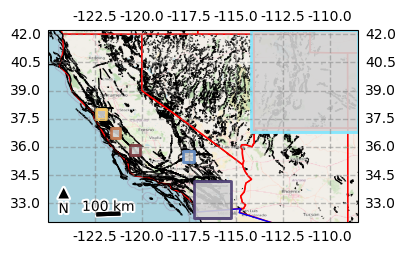

In [ ]:
# Plot USA map with regions
Cali_extent = [-125.0, -108.5, 32.0, 42.2]
fig = plt.figure(figsize=(4,4))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 6)  # Zoom level of 8 
axa.set_extent(Cali_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_USA.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")

shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')
# Fill California with beige
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    axa.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1)


axa.coastlines(resolution='50m')
axa.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)
# Add Fault geometries
colours  = cmap(np.linspace(0, 1, 6))
# Define colors and labels for regions



regions = {
    'Hayward': {'coords': dict(left=-122.42, bottom=37.5, right=-121.92, top=38), 'color': colours[0], 'label': 'fig\n4a.'},
    'Hollister': {'coords': dict(left=-121.65, bottom=36.5, right=-121.15, top=37.0), 'color': colours[1], 'label': 'fig\n5a.'},
    'Parkfield': {'coords': dict(left=-120.65, bottom=35.55, right=-120.1, top=36.1), 'color': colours[2], 'label': 'fig\n6a.'},
    'Salton Sea': {'coords': dict(left=-117.25, bottom=32.2, right=-115.25, top=34.2), 'color': colours[3], 'label': 'fig\n7a.'},
    'Ridgecrest': {'coords': dict(left=-117.8, bottom=35.2, right=-117.2, top=35.8), 'color': colours[4], 'label': 'fig\n8a.'},
    'Utah': {'coords': dict(left=-114.2, bottom=36.8, right=-108.5, top=42.2), 'color': colours[5], 'label': 'fig\n9a.'}
}


label_distance = 1.3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    '''axa.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')'''

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    #axa.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(axa, ccrs.PlateCarree(), 100)
gl=axa.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/USA_map_with_squares.pdf')
plt.show()

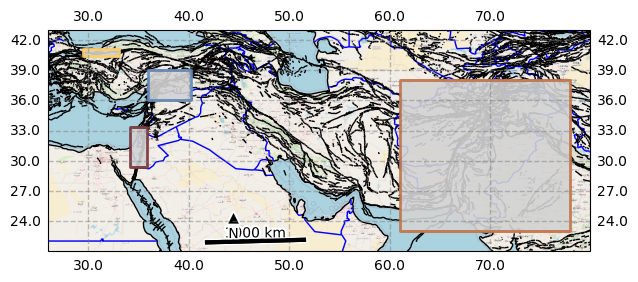

In [ ]:
# Plot Asia map with regions
turkiye_extent = [26.0, 45.0, 36.0, 42.5]
asia_extent = [26.0, 80.0, 21, 43]
plt.figure(figsize=(7, 4))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
slicedCM = cmap(np.linspace(0,1,6))
# Create an instance of GoogleTiles
# google_tiles = img_tiles.GoogleTiles(style='satellite')
# Add the Google Tiles to the axis with a lower zoom level
# ax1.add_image(google_tiles, 10)
ax1.set_extent(turkiye_extent)
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()
ax1.add_image(osm, 6)  # Zoom level of 8  


extent = asia_extent
ax1.set_extent(extent, crs=ccrs.PlateCarree())
 # Add coastlines and other features if desired
ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)


# Add Fault geometries
ax1.add_geometries(gdf_Asia.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")
# Define box colours
# Define colors and labels for regions
regions = {
    'North Anatolia': {'coords': dict(left=29.5, bottom=40.4, right=33.1, top=41.1), 'color': slicedCM[0], 'label': 'Fig 4a/b.'},
    'East Anatolia': {'coords': dict(left=36, bottom=36, right=40.25, top=39), 'color': slicedCM[4], 'label': 'Fig 4c.'},
    'Pakistan': {'coords': dict(left=61, bottom=23, right=78, top=38), 'color': slicedCM[1], 'label': 'Fig 5a/b.'},
    'Israel': {'coords': dict(left=34.2, bottom=29.4, right=35.9, top=33.3), 'color': slicedCM[2], 'label': 'Fig 5c.'},
}
label_distance = 3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax1.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    '''ax1.annotate(label, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')'''

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    #ax1.text(box_x_center, label_y, label, fontsize=11, ha='center', va='center', color='black')

scale_bar(ax1, ccrs.PlateCarree(), 1000)
gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Asia_map_with_squares.pdf')
plt.show()

#ffcf67 #c17449 #773339 #4c3d73 #5f89c3 #81e7ff
<urlopen error [Errno 8] nodename nor servname provided, or not known>


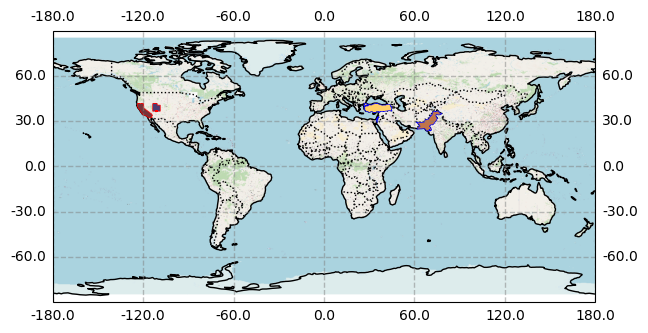

In [ ]:
# Plot combined figure with world map only
fig = plt.figure(figsize=(7, 4))

# Second row: single centered plot
ax_left = plt.subplot(1,1,1, projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')


# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
ax_left.add_image(osm, 6)
ax_left.coastlines()
ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[0], linewidth=0.5)
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[1], linewidth=0.5)
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[4], linewidth=0.5)
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[2], linewidth=0.5)
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[3], linewidth=0.5)
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    

gl = ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')  
ax_left.set_global()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Creepmeter_locations_world.pdf')
plt.show()  

#ffcf67 #c17449 #773339 #4c3d73 #5f89c3 #81e7ff


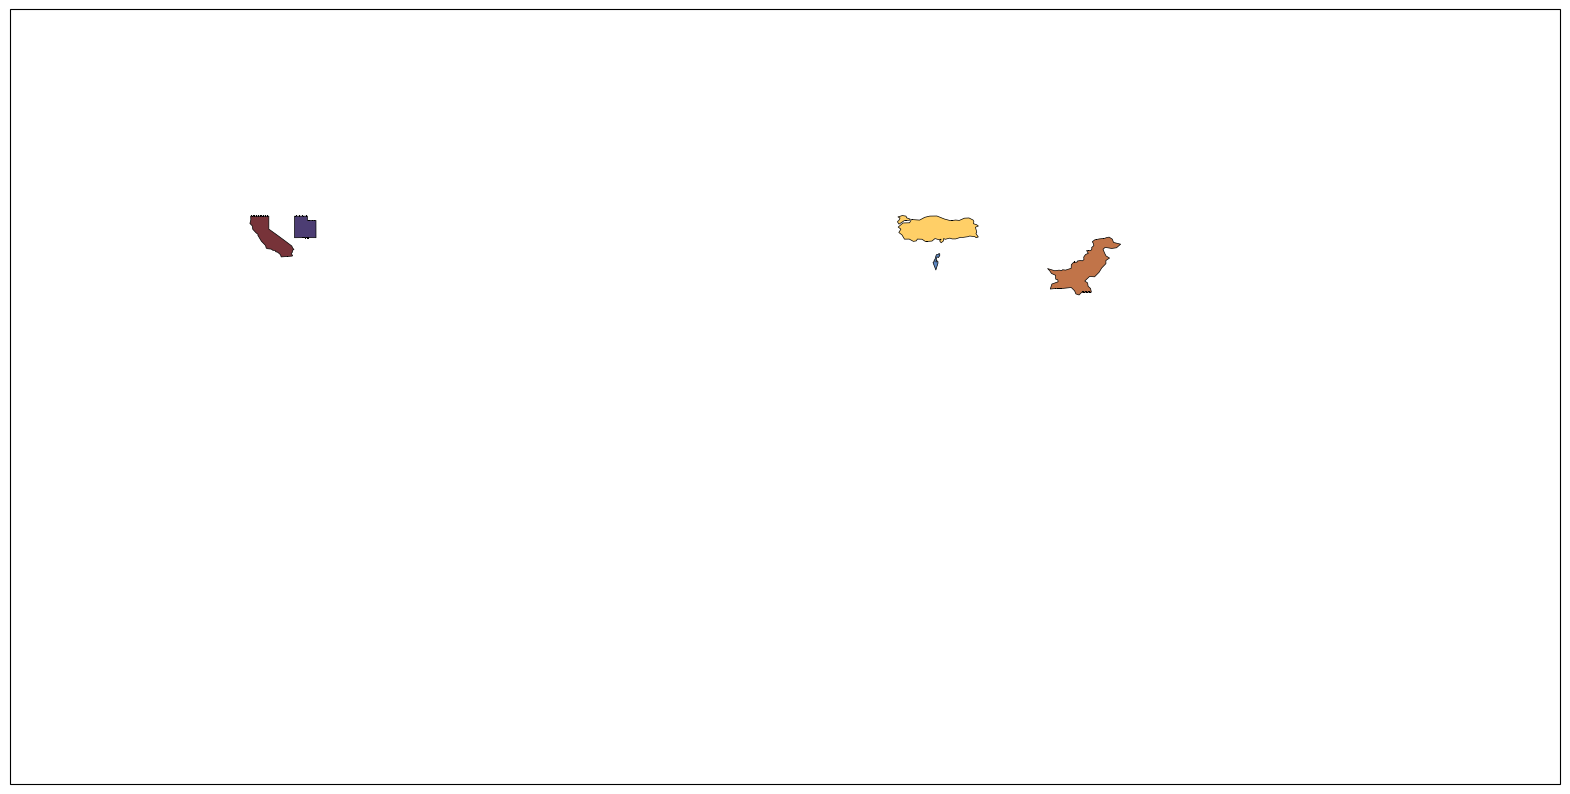

In [ ]:
# Plot country outlines only

fig = plt.figure(figsize=(20, 20))

# Second row: single centered plot
ax_left = plt.subplot(1,1,1, projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')


# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
#ax_left.add_image(osm, 6)
#ax_left.coastlines()
#ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[0], linewidth=0.5)#0
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[1], linewidth=0.5)#1
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[4], linewidth=0.5)#4
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[2], linewidth=0.5)#2
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='k', facecolor=slicedCM[3], linewidth=0.5)#3
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    

#gl = ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = mticker.FormatStrFormatter('%.1f')
gl.yformatter = mticker.FormatStrFormatter('%.1f')  
ax_left.set_global()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/world_outlines.pdf')
plt.show()  

Assessing creep events through time

In [ ]:
# Combine all creepmeters into a single dataframe with type column
df_surge['type'] = 'MLCS'
df_creeplet['type'] = 'CLTS'
df_ce['type'] = 'ECE'
df_all_types = pd.concat([df_surge,df_creeplet,df_ce])

In [ ]:
# Round sampling rate to nearest integer
df_all_types['Sampling rate, s'] = round(df_all_types['Sampling rate, s'])

In [ ]:
# Define a colormap
colours  = cmap(np.linspace(0, 1, 11))

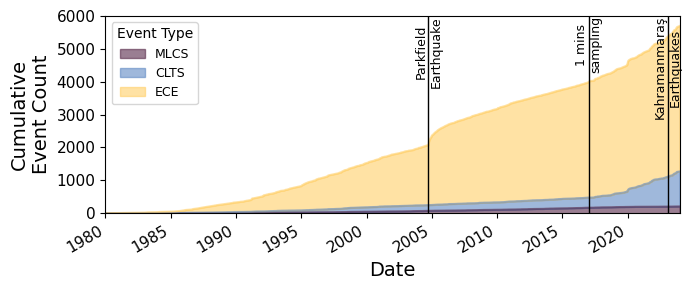

In [ ]:
# Plot cumulative event count over time by type
plt.figure(figsize=(7,3))
ax = plt.subplot(1, 1, 1)
# Group by date and type
grouped = df_all_types.groupby([pd.Grouper(key='Start Time', freq='D'), 'type']).size().unstack(fill_value=0)

# Cumulative sum
cumulative = grouped.cumsum()

# Sort columns by total count (smallest to largest → largest on top)
sorted_cols = cumulative.iloc[-1].sort_values(ascending=True).index
cumulative_sorted = cumulative[sorted_cols]

# Plot
cumulative_sorted.plot(kind='area', stacked=True, ax=ax,
                       color=[colours[i] for i in [5, 8, 0]],alpha=0.6)  # Match colour to order if needed
ax.set_ylabel("Cumulative\nEvent Count",fontsize=14)
ax.set_xlabel("Date",fontsize=14)
ax.set_xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
ax.set_ylim([0,6000])
#plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=['k'],ymin=0,ymax=6000,linewidth=3)

ax.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2017,1,1,0,0,0),dt.datetime(2023,2,6)],colors=['k','k','k'],ymin=0,ymax=6000,linewidth=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9,title='Event Type')
legend.get_title().set_fontsize(10)
plt.tight_layout()
plt.text(dt.datetime(2004,9,28,17,15,24),6000,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2017,1,1,0,0,0),6000,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2023,2,6),6000,'Kahramanmaraş\nEarthquakes',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)

plt.savefig('../../Creep_catalog_stats_figures/New Plots/event_v_surge_v_creeplet.pdf')
plt.show()

In [ ]:
# Load creepmeter lifetimes data
creepmeter_lifetimes = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
creepmeter_lifetimes['Start Time'] = pd.to_datetime(creepmeter_lifetimes['Start Time'])

In [ ]:
# Convert sampling rate to minutes
reversed_frequency_dict = {
    '1S': 1/60,    # 1 second
    '10S': 1/6,    # 10 seconds
    '30S': 1/2,    # 30 seconds
    '1T': 1,       # 1 minute
    '2T': 2,       # 2 minutes
    '5T': 5,       # 5 minutes
    '10T': 10,     # 10 minutes
    '15T': 15,     # 15 minutes
    '30T': 30,     # 30 minutes
    '60T': 60      # 60 minutes
}
creepmeter_lifetimes['Sampling rate, mins_number'] = round(creepmeter_lifetimes['Sampling rate, mins'].map(reversed_frequency_dict),2)
min_samples = creepmeter_lifetimes.copy(deep=True)
min_samples.drop(min_samples[min_samples['Sampling rate, mins_number']>1].index,inplace=True)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=creep['Start Time'].min().floor('D'),
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_49793/763798419.py:30: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  active_by_rate = activ

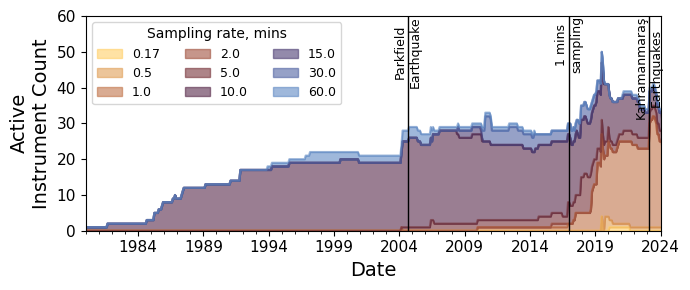

In [73]:
# Assume your df has: Start Time, End Time, Sampling rate, mins
creep = creepmeter_lifetimes.copy()
creep['End Time'] = pd.to_datetime(creep['End Time'])
creep['Start Time'] = pd.to_datetime(creep['Start Time'])

# Convert sampling rate strings (like "1T", "10T", "10S") to Timedelta objects
creep['Sampling rate, mins'] = pd.to_timedelta(creep['Sampling rate, mins'])

# Convert timedelta to minutes (float)
creep['Sampling rate, mins'] = round(creep['Sampling rate, mins'].dt.total_seconds()/60,2)

# Create daily date range
date_range = pd.date_range(start=creep['Start Time'].min().floor('D'), 
                           end=creep['End Time'].max().ceil('D'), freq='M')

# Create empty DataFrame with dates as index
active_matrix = pd.DataFrame(0, index=date_range, columns=creep.index)

# Fill matrix: mark instrument as active on each day it's alive
for idx, row in creep.iterrows():
    active_matrix.loc[row['Start Time'].floor('D'):row['End Time'].ceil('D'), idx] = 1

# Add sampling rate info
sampling_rate = creep['Sampling rate, mins']

# Replace columns with corresponding sampling rate
active_matrix.columns = sampling_rate

# Now group by sampling rate
active_by_rate = active_matrix.groupby(axis=1, level=0).sum()

# Plot
plt.figure(figsize=(7, 3))
ax = plt.subplot(1, 1, 1)
active_by_rate.plot(kind='area', stacked=True, ax=ax, color=colours,alpha=0.6)
plt.ylabel("Active\nInstrument Count", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.xlim([dt.datetime(1980, 1, 1), dt.datetime(2024, 1, 1)])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Sampling rate, mins",ncol=3)
legend.get_title().set_fontsize(10)
plt.tight_layout()

# Annotations
'''plt.vlines([dt.datetime(2004,1,1), dt.datetime(2017,11,1),dt.datetime(2023,2,1)],colors=['k', 'grey','lightgrey'], ymin=0, ymax=50, linewidth=3)
plt.text(dt.datetime(2004,1,1), 50,'Southern\nCalifornia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2017,11,1), 50, 'North\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)
plt.text(dt.datetime(2023,2,1), 50, 'East\nAnatolia', rotation=90, va='top', ha='center', fontsize=14)'''
plt.vlines([dt.datetime(2004,9,28,17,15,24),dt.datetime(2017,1,1,0,0,0),dt.datetime(2023,2,6)],colors=['k','k','k'],ymin=0,ymax=150,linewidth=1)
plt.text(dt.datetime(2004,9,28,17,15,24),60,'Parkfield\nEarthquake',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2017,1,1,0,0,0),60,'1 mins\nsampling',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.text(dt.datetime(2023,2,6),60,'Kahramanmaraş\nEarthquakes',rotation=90,verticalalignment='top',horizontalalignment='center',fontsize=9)
plt.ylim([0,60])
plt.tight_layout()

plt.savefig('../../Creep_catalog_stats_figures/New Plots/Sampling_freqs_through_time_active.pdf')
#plt.savefig('../../Creep_catalog_stats_figures/Sampling_freqs_through_time_corrected.pdf')
plt.show()


Taxonomy Figures

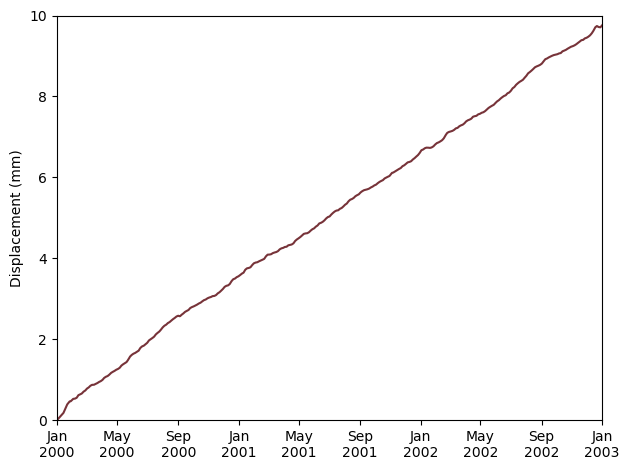

In [ ]:
# Plot example CTM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/CTM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['CTM1_60.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2000, 1, 1)) & (decoded_time <= dt.datetime(2003, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.ylim([0,10])
            plt.xlim([dt.datetime(2000, 1, 1), dt.datetime(2003, 1, 1)])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/Background_CTM1.pdf')
            plt.show()

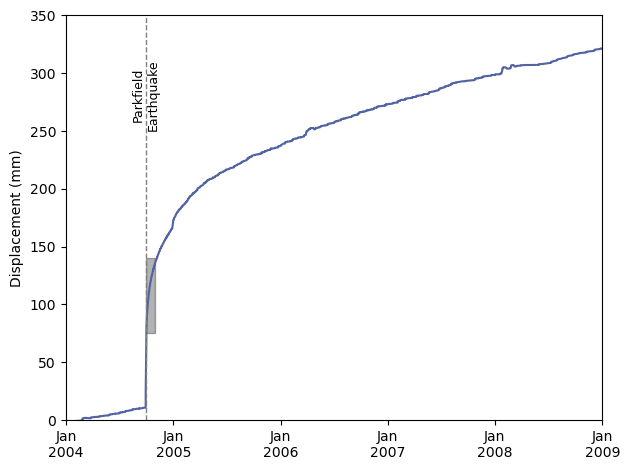

In [ ]:
# Plot example XMM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMM1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2004, 1, 1)) & (decoded_time <= dt.datetime(2009, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]


            # define start and end times
            t1 = dt.datetime(2004, 10, 1)
            t2 = dt.datetime(2004, 11, 1)

            # convert to matplotlib date numbers
            x0 = mdates.date2num(t1)
            width = mdates.date2num(t2) - mdates.date2num(t1)

            # y-range
            y0, y1 = 75, 140
            height = y1 - y0

            # create rectangle
            rect = Rectangle((x0, y0), width, height, color='black', alpha=0.3)

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            ax.add_patch(rect)
            plt.plot(decoded_time, slip,color = colours[7],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors='grey',ymin=0,ymax=350,linewidth=1,linestyle='--')
            plt.text(dt.datetime(2004,9,28,17,15,24),250,'Parkfield\nEarthquake',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            plt.ylim([0,350])
            plt.xlim([dt.datetime(2004, 1, 1), dt.datetime(2009, 1, 1)])
            
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/afterslip_XMM1.pdf')
            plt.show()

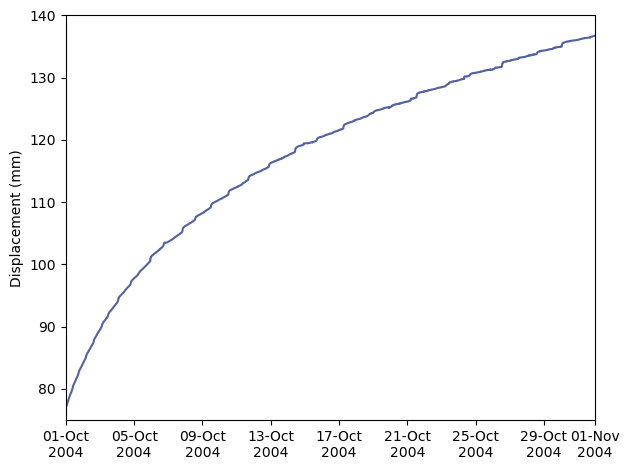

In [ ]:
# Plot zoomed in example XMM1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMM1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMM1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2004, 1, 1)) & (decoded_time <= dt.datetime(2009, 1, 1))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[7],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.vlines([dt.datetime(2004,9,28,17,15,24)],colors=colours[2],ymin=0,ymax=350,linewidth=1)
            #plt.text(dt.datetime(2004,9,28,17,15,24),250,'Parkfield\nEarthquake',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            plt.ylim([75,140])
            plt.xlim([dt.datetime(2004, 10, 1), dt.datetime(2004, 11, 1)])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/afterslip_XMM1_zoom.pdf')
            plt.show()

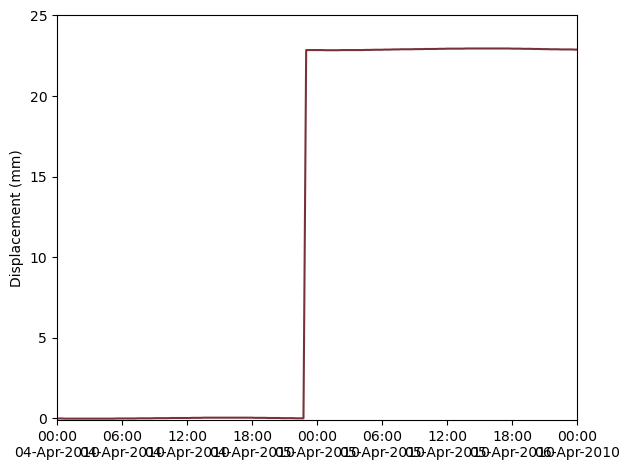

In [ ]:
# Plot example SU30 data
with h5py.File('../../Data/DATA_tidied/HDF5/SU30.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['SU30_15.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2010, 4, 4)) & (decoded_time <= dt.datetime(2010, 4, 6))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(2010, 4, 4), dt.datetime(2010, 4, 6)])
            plt.ylim([-0.1,25])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/triggeredslip_SU30.pdf')
            plt.show()

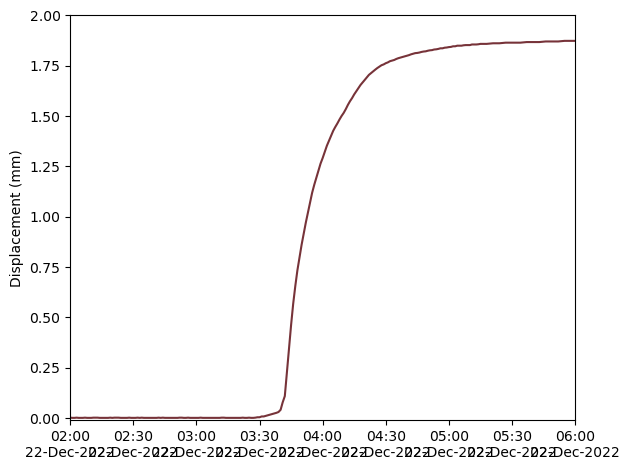

In [ ]:
# Plot example XMR1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XMR1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XMR1_1.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)

            bool_mask = (decoded_time >= dt.datetime(2022,12,22)) & (decoded_time <= dt.datetime(2022, 12, 23))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            #plt.vlines([dt.datetime(2022,12,22,3,27,00)],colors=colours[2],ymin=-5,ymax=15,linewidth=1)
            plt.xlim([dt.datetime(2022,12,22,2), dt.datetime(2022, 12, 22,6, 0,0)])
            plt.ylim([-0.01,2])
            #plt.text(dt.datetime(2022,12,22,3,27,00),1.5,'ECE\nOnset',rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=9)
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/ECE_XMR1.pdf')
            plt.show()

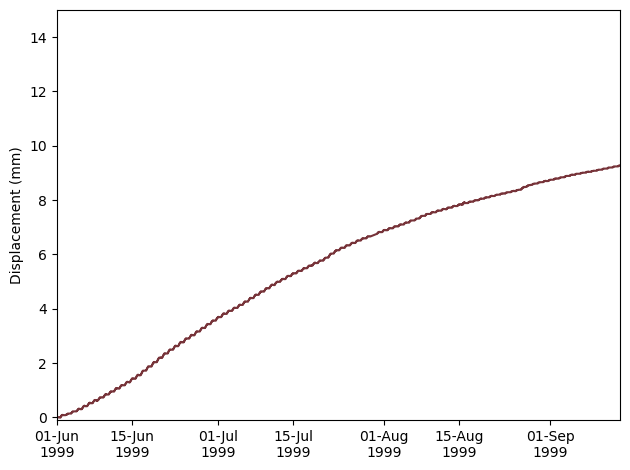

In [ ]:
# Plot example XVA1 data
with h5py.File('../../Data/DATA_tidied/HDF5/XVA1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['XVA1_10.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)
	#1999-06-03 15:00:00	1999-09-12 16:20:00	
            bool_mask = (decoded_time >= dt.datetime(1999,6,1)) & (decoded_time <= dt.datetime(1999, 9, 15))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b\n%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(1999,6,1), dt.datetime(1999, 9, 14)])
            plt.ylim([-0.1,15])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/MLCS_XVA1.pdf')
            plt.show()

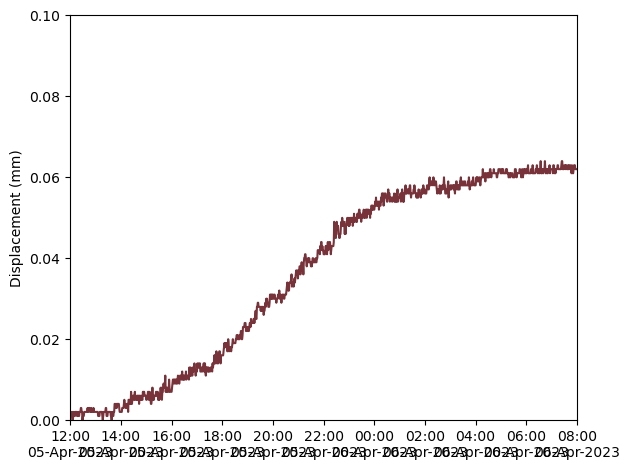

In [ ]:
# Plot example CWN1 data
with h5py.File('../../Data/DATA_tidied/HDF5/CWN1.h5', 'r') as f:
    # Loop through each key in the file
    keys = list(f.keys())
    f.attrs
    for key in f.keys():
        starts = []
        ends = []
        event_slip = []  
        event_duration = []
        event_sample_rate = []
        event_velocity = []
        days_list = []
        if key in ['CWN1_1.0mins']:
            #print("Key:", key)
            #print('extracting data')
            data = f[key]  # Access the dataset
            data_keys = list(data.keys())
            #print(data_keys)
            slip = data[data_keys[0]][:]
            time =  data[data_keys[1]][:]
            decoded_time = [byte_str.decode('utf-8') for byte_str in time]
            decoded_time = pd.to_datetime(decoded_time)
	#1999-06-03 15:00:00	1999-09-12 16:20:00	
            bool_mask = (decoded_time >= dt.datetime(2023,4,5,12)) & (decoded_time <= dt.datetime(2023, 4, 6,8))
            slip = slip[bool_mask]
            decoded_time = decoded_time[bool_mask]
            slip = slip- slip[0]

            plt.Figure(figsize=(3, 3))
            ax = plt.subplot(1, 1, 1)
            plt.plot(decoded_time, slip,color = colours[4],linewidth=1.5)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b-%Y'))
            plt.ylabel('Displacement (mm)')
            plt.xlim([dt.datetime(2023,4,5,12), dt.datetime(2023, 4, 6,8)])
            plt.ylim([0,0.1])
            plt.tight_layout()
            plt.savefig('../../Creep_catalog_stats_figures/New Plots/CLTS_CWN1.pdf')
            plt.show()

Comparing the number of events before and after the 2004 Parkfield earthquake

In [ ]:
# Some basic stats on Parkfield events
boolarr_cali = np.logical_or.reduce((df_all['Network']=='HOL',df_all['Network']=='HAY',df_all['Network']=='CAL',df_all['Network']=='SOCAL',df_all['Network']=='PARK'))
df_all_cali = df_all[boolarr_cali]
print('Cali events',len(df_all_cali))

boolarr_park = df_all_cali['Network']=='PARK'
df_all_park = df_all_cali[boolarr_park]
print('Parkfield events',len(df_all_park))
df_all_park.drop(df_all_park[df_all_park['Creepmeter abbreviation']=='C461'].index,inplace=True)

Parkfield_eq = dt.datetime(2004,9,28,17,15,24)
Elazig_eq = dt.datetime(2020,1,24,17,55,15)

boolarr = np.logical_and(df_all_park['Start Time']>=Parkfield_eq,df_all_park['Start Time']<=Parkfield_eq+dt.timedelta(days=100))
print('percentage of events in 100 days after parkfield',len(df_all_park[boolarr])/len(df_all)*100,len(df_all_park[boolarr]))

boolarr_100_b = np.logical_and(df_all_park['Start Time']<=dt.datetime(2004,9,28,17,15,24),df_all_park['Start Time']>=Parkfield_eq-dt.timedelta(days=100))
print('percentage of events in 100 days before parkfield',len(df_all_park[boolarr_100_b])/len(df_all)*100,len(df_all_park[boolarr_100_b]))

print((len(df_all_park[boolarr])-len(df_all_park[boolarr_100_b]))/len(df_all_park[boolarr_100_b])*100)

boolarr_pre_parkfield = df_all['Start Time']<dt.datetime(2004,9,28,17,15,24)
print('percentage of events pre parkfield',len(df_all_park[boolarr])/len(df_all[boolarr_pre_parkfield])*100)




Cali events 4918
Parkfield events 3079
percentage of events in 100 days after parkfield 4.7585601404741 271
percentage of events in 100 days before parkfield 0.24582967515364354 14
1835.7142857142858
percentage of events pre parkfield 13.091787439613526
SIV1 events 112


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_29619/3327549421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_park.drop(df_all_park[df_all_park['Creepmeter abbreviation']=='C461'].index,inplace=True)


In [ ]:
# Number of events in California networks
print('number of events in California:', 
      len(df_all[df_all['Network'] == 'HOL']) + 
      len(df_all[df_all['Network'] == 'HAY']) + 
      len(df_all[df_all['Network'] == 'PARK']) + 
      len(df_all[df_all['Network'] == 'SOCAL']) + 
      len(df_all[df_all['Network'] == 'RID']) + 
      len(df_all[df_all['Network'] == 'CAL']))

# Number of events in Utah
print('number of events in Utah:', len(df_all[df_all['Network'] == 'UTA']))

# Number of events specifically in SOCAL
print('number of events in SoCal', len(df_all[df_all['Network'] == 'SOCAL']))

# Percentage of events recorded at XMM1 instrument
print('percentage of events at XMM1', 
      (len(df_all[df_all['Creepmeter abbreviation'] == 'XMM1']) / len(df_all)) * 100)


number of events in California: 4919
number of events in Utah: 6
number of events in SoCal 230
percentage of events at XMM1 18.33187006145742


In [ ]:
# Percentage change in events pre- and post- parkfield
days = 365
before =[]
after = []
xmeter = []
for i in range(len(PARK)):
    abbrv = PARK['Creepmeter_abbrv'].iloc[i]
    if abbrv == 'XPK1':
        events = df_all_park[df_all_park['Creepmeter abbreviation']==abbrv]
        events_post = df_all_park[df_all_park['Creepmeter abbreviation']=='XPK2']
        events = pd.concat([events,events_post])
    elif abbrv in ['XPK2','XRSW','XHSW','C461','C462']:
        continue
    else:
        events = df_all_park[df_all_park['Creepmeter abbreviation']==abbrv]
    boolarr = np.logical_and(events['Start Time']>=Parkfield_eq,events['Start Time']<=Parkfield_eq+dt.timedelta(days=days))
    after_no = np.array([len(events[boolarr])])
    boolarr_100_b = np.logical_and(events['Start Time']<=dt.datetime(2004,9,28,17,15,24),events['Start Time']>=Parkfield_eq-dt.timedelta(days=days))
    before_no = np.array([len(events[boolarr_100_b])])
    print((after_no-before_no)/before_no*100,abbrv)
    xmeter.append(abbrv)
    after.append(len(events[boolarr]))
    before.append(len(events[boolarr_100_b]))



[-16.66666667] XSC1
[302.7027027] XMM1
[1480.] XMD1
[1625.] XVA1
[1166.66666667] XPK1
[580.] XTA1
[1300.] WKR1
[500.] CRR1
[inf] XGH1
[900.] X461


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_1684/2930865302.py:19: RuntimeWarning: divide by zero encountered in divide
  print((after_no-before_no)/before_no*100,abbrv)


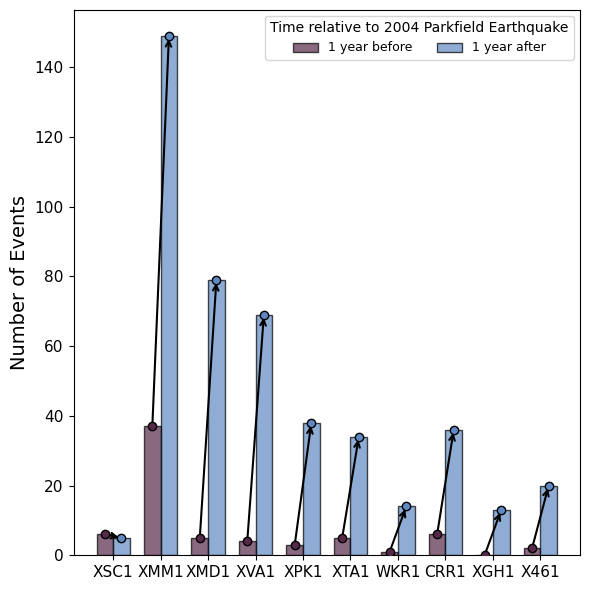

In [ ]:
# Bar plot comparing before and after event counts for each creepmeter
x = np.arange(len(xmeter))  # positions for groups
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(6, 6))

# Plot side-by-side bars
ax.bar(x - width/2, before, width, label="1 year before",color=colours[5],edgecolor='k',alpha=0.7)
ax.bar(x + width/2, after, width, label="1 year after",color=colours[8],edgecolor='k',alpha=0.7)

# Labels and formatting
ax.set_ylabel("Number of Events",fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(xmeter)
ax.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Time relative to 2004 Parkfield Earthquake",ncol=2)
legend.get_title().set_fontsize(10)

before_x = x - width/2
after_x = x + width/2
ax.scatter(before_x, before,color=colours[5],edgecolor='k', zorder=5)
ax.scatter(after_x, after, color=colours[8],edgecolor='k', zorder=5)

# Add arrows from before to after
for bx, by, axx, ay in zip(before_x, before, after_x, after):
    ax.annotate(
        "", 
        xy=(axx, ay), xycoords="data",
        xytext=(bx, by), textcoords="data",
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5)
    )


plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_event_rate_comparison_parkfield.pdf')
plt.show()

In [ ]:
# Some basic stats on northern events compared to parkfield
boolarr_hol = df_all_cali['Network']=='HOL'
df_all_hol = df_all_cali[boolarr_hol]
print('Parkfield events',len(df_all_hol))

Parkfield_eq = dt.datetime(2004,9,28,17,15,24)

boolarr = np.logical_and(df_all_hol['Start Time']>=Parkfield_eq,df_all_hol['Start Time']<=Parkfield_eq+dt.timedelta(days=100))
print('percentage of events in 100 days after parkfield',len(df_all_hol[boolarr])/len(df_all)*100,len(df_all_hol[boolarr]))

boolarr_100_b = np.logical_and(df_all_hol['Start Time']<=dt.datetime(2004,9,28,17,15,24),df_all_hol['Start Time']>=Parkfield_eq-dt.timedelta(days=100))
print('percentage of events in 100 days before parkfield',len(df_all_hol[boolarr_100_b])/len(df_all)*100,len(df_all_hol[boolarr_100_b]))

print((len(df_all_hol[boolarr])-len(df_all_hol[boolarr_100_b]))/len(df_all_hol[boolarr_100_b])*100)




Parkfield events 1080
percentage of events in 100 days after parkfield 0.21071115013169445 12
percentage of events in 100 days before parkfield 0.24582967515364354 14
-14.285714285714285


In [ ]:
# Percentage change in events pre- and post- parkfield for HOL network
before_hol =[]
after_hol = []
xmeter_hol = []
for i in range(len(HOL)):
    days = 365
    abbrv = HOL['Creepmeter_abbrv'].iloc[i]
    if abbrv == 'XHR2':
        events = df_all_hol[df_all_hol['Creepmeter abbreviation']==abbrv]
        events_post = df_all_hol[df_all_hol['Creepmeter abbreviation']=='XHR3']
        events = pd.concat([events,events_post])
        days = ((pd.to_datetime(creepmeter_lifetimes[creepmeter_lifetimes['Creepmeter_abbrv']=='XHR2']['End Time']) - dt.datetime(2004,9,28,17,15,24, tzinfo=dt.timezone.utc))/dt.timedelta(days=1)).iloc[0]
    elif abbrv in ['XHR3','XSH1','XSJ3','XHR1','CWC3','FCR1']:
        continue
    else:
        events = df_all_hol[df_all_hol['Creepmeter abbreviation']==abbrv]


    boolarr = np.logical_and(events['Start Time']>=Parkfield_eq,events['Start Time']<=Parkfield_eq+dt.timedelta(days=days))
    after_no = np.array([len(events[boolarr])])
    boolarr_100_b = np.logical_and(events['Start Time']<=dt.datetime(2004,9,28,17,15,24),events['Start Time']>=Parkfield_eq-dt.timedelta(days=days))
    before_no = np.array([len(events[boolarr_100_b])])
    print((after_no-before_no)/before_no*100,abbrv)

    xmeter_hol.append(abbrv)
    after_hol.append(len(events[boolarr]))
    before_hol.append(len(events[boolarr_100_b]))



[100.] SJN1
[-44.44444444] XSJ2
[50.] XHR2
[400.] CWN1
[-41.66666667] XMR1


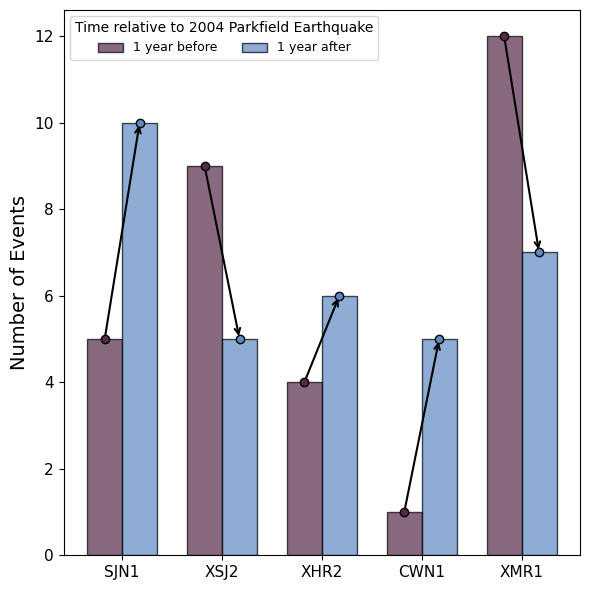

In [ ]:
# Bar plot comparing before and after event counts for each creepmeter
x = np.arange(len(xmeter_hol))  # positions for groups
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(6, 6))

# Plot side-by-side bars
ax.bar(x - width/2, before_hol, width, label="1 year before",color=colours[5],edgecolor='k',alpha=0.7)
ax.bar(x + width/2, after_hol, width, label="1 year after",color=colours[8],edgecolor='k',alpha=0.7)

# Labels and formatting
ax.set_ylabel("Number of Events",fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(xmeter_hol)
ax.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
legend = plt.legend(fontsize=9, title="Time relative to 2004 Parkfield Earthquake",ncol=2)
legend.get_title().set_fontsize(10)

before_x = x - width/2
after_x = x + width/2
ax.scatter(before_x, before_hol,color=colours[5],edgecolor='k', zorder=5)
ax.scatter(after_x, after_hol, color=colours[8],edgecolor='k', zorder=5)

# Add arrows from before to after
for bx, by, axx, ay in zip(before_x, before_hol, after_x, after_hol):
    ax.annotate(
        "", 
        xy=(axx, ay), xycoords="data",
        xytext=(bx, by), textcoords="data",
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5)
    )

plt.tight_layout()
plt.savefig('../../Creep_catalog_stats_figures/New Plots/Parkfield_event_rate_comparison_hol.pdf')
plt.show()